In [1]:
# Importing Libraries 
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import requests 
import time 
from scipy.stats import linregress
import seaborn as sns

# Reading CSV File
df=pd.read_csv("Levels_Fyi_Salary_Data.csv", delimiter=",")
df.info()
df.head(60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.50,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.00,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.00,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.00,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.00,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
5,6/21/2017 17:27,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.50,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
6,6/22/2017 12:37,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.00,NaN,180000,...,0,0,0,0,0,0,0,0,NaN,NaN
7,6/22/2017 13:55,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.00,NaN,135000,...,0,0,0,0,0,0,0,0,NaN,NaN
8,6/22/2017 23:08,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.00,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
9,6/26/2017 21:25,Microsoft,63,Software Engineer,201000,"Seattle, WA",12.0,6.00,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
#Connor

#Creating a new data frame that removes counts that had "0" for base salary
#Other focuses may want to analyze this DF further to see if other results should be removed that have 0, but for this portion
#of the study, we just want to make sure our data is reflecting active salaries to find the top hiring companies and more
df_cleaned = df[df['basesalary'] != 0]
df_cleaned.head(10)

In [ ]:
#Find the top 10 hiring companies by counting the amount of repeating companies that show up in the data (essentially a for loop)
#Throw this data into a new cleaned DF to work with
top_companies = df_cleaned["company"].value_counts()[0:10].reset_index()
top_companies.columns = ["company", "Count"]
top_companies

In [ ]:
#Using Seaborn as a means of showing this data in a clean and easy bar graph
import seaborn as sns
plt.figure(figsize=(10,10))
#adjusting the company name displays rotations
plt.xticks(rotation=60)
#setting the x label (company name)
plt.xlabel("Company Name")
#setting the title
plt.title("Top 10 Hiring Companies")
#plotting the barplot within seaborn sns using our x and y labels set, along with the top companies data frame from above
sns.barplot(x='company',y='Count',data=top_companies)
plt.show()

In [ ]:
#Find the top 10 job roles hired using the same approach as finding the top 10 companies
#Throwing into a data frame for a clear, easy visual to work off of
top_jobs = df_cleaned['title'].value_counts()[0:10].reset_index()
top_jobs.columns = ["Job", "Count"]
top_jobs

In [ ]:
#Once again using Seaborn as a means of showing this data in a clean bar graph
import seaborn as sns
plt.figure(figsize=(8,12))
plt.xticks(rotation=60)
plt.xlabel("Jobs")
plt.title("Top 10 Jobs")
sns.barplot(x='Job',y='Count',data=top_jobs)
plt.show()

In [ ]:
#Find the top 10 hiring locations 
#Throwing into a data frame for a clear, easy visual to work off of
top_locations = df_cleaned['location'].value_counts()[0:10].reset_index()
top_locations.columns = ["Location", "Count"]
top_locations

In [ ]:
#Using Seaborn once more as a means of showing this data data in a clean bar graph
import seaborn as sns
import seaborn as sns
plt.figure(figsize=(8,12))
plt.xticks(rotation=75)
plt.xlabel("Locations")
plt.title("Top 10 Job Locations")
sns.barplot(x='Location',y='Count',data=top_locations)
plt.show()

In [ ]:
data_sci = df[df.title.str.contains('Data Scientist')]
biz_analyst = df[df.title.str.contains('Business Analyst')]
data_sci_biz_analyst = pd.concat([data_sci, biz_analyst], axis=0)
data_sci_biz_analyst.head()

In [ ]:
#Find the amount of business analysts and data scientists titles added year over year
data_sci_biz_analyst['timestamp'] = pd.to_datetime(data.timestamp)
year = data_sci_biz_analyst.timestamp.dt.year
year_new_counts = year.value_counts()
year_new_counts
#The data is showing us that there is much growing demands for both titles from 2018 to 2021

In [ ]:
#group by company and min/ max yearly compensation

In [ ]:
#Education compared to salary/totalyearlycompensation 

In [ ]:
#Alfredo
#years of experience/ years at company and comparison to yearly compensation
df_exp = pd.DataFrame(df,columns=["yearsofexperience","yearsatcompany","basesalary","stockgrantvalue","bonus","totalyearlycompensation"])
print(df_exp["totalyearlycompensation"].min())
print(df_exp["totalyearlycompensation"].max())
print(df_exp["yearsatcompany"].min())
print(df_exp["yearsatcompany"].max())
yearlycomp=df_exp["totalyearlycompensation"]
industryyears=df_exp["yearsofexperience"]
companyyears=df_exp["yearsatcompany"]
df_exp.head()
#Find and remove the outliers of both years and pay (Maybe top 100?)
#Check if other columns are usable and, if so, remove the zeroes from them

In [ ]:
plt.scatter(industryyears,yearlycomp,marker="o", facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(industryyears, yearlycomp)
regress_values = industryyears * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(industryyears,regress_values,"r-")
plt.annotate(line_eq,(24,4500000),fontsize=15,color="red")
plt.xlabel("Years Working in the Industry")
plt.ylabel("Compensation for Work per Year (Millions)")
plt.title("Years In Industry And Compensation")
plt.savefig("output_images/Years_In_Industry");

In [ ]:
plt.scatter(companyyears,yearlycomp,marker="o", facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(companyyears, yearlycomp)
regress_values = companyyears * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(companyyears,regress_values,"r-")
plt.annotate(line_eq,(24,4500000),fontsize=15,color="red")
plt.xlabel("Years Working in the Company")
plt.ylabel("Compensation for Work per Year (Millions)")
plt.title("Years In Company And Compensation")
plt.savefig("output_images/Years_In_Company");

In [2]:
#Neel
#male/ female convert to usable data and compare to yearly compensation
df.columns
df['gender'].unique()

array([nan, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [3]:
# Filtered DataFrame to only include Gender , Job Title, Base Salary, & Yearly Compensation. (4 Columns)
gender_df = df[["gender", "title", "company", "basesalary", "totalyearlycompensation"]]
#gender_df

# Remove NaN values from Gender and remove base salaries that are 0
gender_df = gender_df.dropna()
filt_gender_df = gender_df.loc[gender_df["basesalary"] > 0, ["gender", "title", "company", "basesalary", "totalyearlycompensation"]]
#filt_gender_df.sort_values(by=['gender'])

# Remove 'Title: Senior Software Engineer'
filt_gender_df = filt_gender_df.drop(index=11010)
filt_gender_df.reset_index(drop  = True)

,gender,title,company,basesalary,totalyearlycompensation
0,Male,Software Engineer,GE Digital,130000,140000
1,Male,Software Engineer,Amazon,142000,172000
2,Male,Software Engineer,Uber,161000,325000
3,Male,Software Engineer,Microsoft,118000,150000
4,Male,Software Engineer,Google,210000,640000
...,...,...,...,...,...
42103,Male,Software Engineer,Amazon,104000,135000
42104,Male,Software Engineer,Amazon,160000,350000
42105,Female,Product Manager,Microsoft,200000,305000
42106,Male,Software Engineer,Amazon,106000,152000


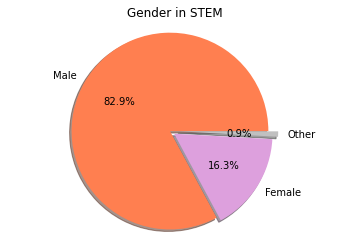

In [4]:
# Pie Chart of Genders in STEMS
gender = ['Male', 'Female', 'Other']
count = filt_gender_df['gender'].value_counts()
colors = ['coral', 'plum', 'silver']
explode = (0, 0.05, 0.1)

plt.title("Gender in STEM")
plt.pie(count, explode=explode, labels = gender, colors = colors, autopct = "%1.1f%%", shadow = True)
plt.axis("equal")
plt.show
plt.savefig("output_images/Genders_In_Stem.png")

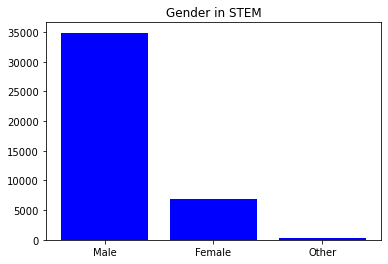

In [5]:
x_axis = gender
y_axis = count
plt.bar(x_axis, y_axis, color = 'blue')
plt.title("Gender in STEM")
plt.show
plt.savefig("output_images/Genders_In_Stem_BarGraph")

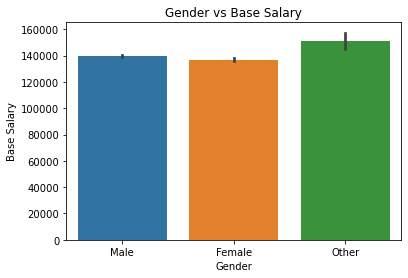

In [6]:
sns.barplot(x = filt_gender_df.gender, y = filt_gender_df.basesalary);
plt.title("Gender vs Base Salary")
plt.xlabel("Gender")
plt.ylabel("Base Salary")
plt.show
plt.savefig("output_images/Gender_vs_BaseSalary");

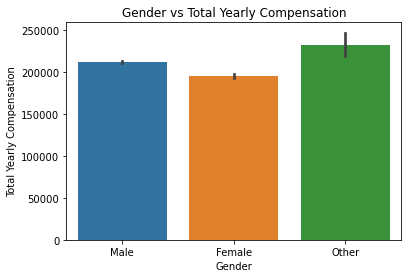

In [7]:
sns.barplot(x = filt_gender_df.gender, y = filt_gender_df.totalyearlycompensation);
plt.title("Gender vs Total Yearly Compensation")
plt.xlabel("Gender")
plt.ylabel("Total Yearly Compensation")
plt.show
plt.savefig("output_images/Gender_vs_TotalYearlyCompensation");